# Getting Started with Julia in Colab/Jupyter
You can either run this notebook in Google Colab, or using Jupyter on your own machine.

## Running on Google Colab
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia (the Jupyter kernel for Julia) and other packages. You can update `JULIA_VERSION` and the other parameters, if you know what you're doing. Installation takes 2-3 minutes.
3. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the _Checking the Installation_ section.

* _Note_: If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2 and 3.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia Gadfly DataFrames"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2022-05-05 04:53:00 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package Gadfly...
Installing Julia package DataFrames...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


## Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system (if you ever ask for help or file an issue about Julia, you should always provide this information).

In [ ]:
versioninfo()

Julia Version 1.6.0
Commit f9720dc2eb (2021-03-24 12:55 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 4


# Imports

In [1]:
using Gadfly
using LinearAlgebra

### Simulating Time

In [2]:
t = LinRange(0,40,1000)

1000-element LinRange{Float64}:
 0.0,0.04004,0.0800801,0.12012,0.16016,…,39.8398,39.8799,39.9199,39.96,40.0

Distance travelled by robber: $d_r=2.5t$


In [3]:
dᵣ = 2.5t

1000-element LinRange{Float64}:
 0.0,0.1001,0.2002,0.3003,0.4004,…,99.5996,99.6997,99.7998,99.8999,100.0

Distance travelled by the sherrif: $d_s = 3(t-5)$

In [4]:
dₛ = 3(t .- 5)

1000-element LinRange{Float64}:
 -15.0,-14.8799,-14.7598,-14.6396,-14.5195,…,104.52,104.64,104.76,104.88,105.0

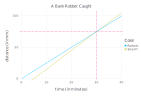

In [5]:
plot(
    Coord.cartesian(xmin=0, ymin=0),
    layer(x=t, y=dᵣ, Geom.line, color=["Robber"]),
    layer(x=t, y=dₛ, Geom.line, color=["Sherrif"]),
    layer(yintercept=[75], Geom.hline(color=[colorant"hotpink"], style=[[8pt, 3pt]])),
    layer(xintercept=[30], Geom.vline(color=[colorant"hotpink"], style=[[8pt, 3pt]])),
    Guide.xlabel("time (in minutes)"), Guide.ylabel("distance (in mm)"), Guide.title("A Bank Robber Caught")
)

In [6]:
t = LinRange(0,120,1000)

Eₘ₁ = t

Eₘ₂ = 4(t .- 30)

1000-element LinRange{Float64}:
 -120.0,-119.52,-119.039,-118.559,…,358.078,358.559,359.039,359.52,360.0

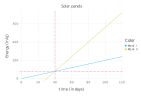

In [11]:
plot(
    Coord.cartesian(xmin=0, ymin=0), 
    layer(x=t, y=Eₘ₁, Geom.line,color=["Mark I"]), 
    layer(x=t, y=Eₘ₂, Geom.line,color=["Mark II"]), 
    layer(yintercept=[40], Geom.hline(color=[colorant"hotpink"], style=[[8pt, 3pt]])),
    layer(xintercept=[40],Geom.vline(color=[colorant"hotpink"], style=[[8pt, 3pt]])),
    Guide.xlabel("time (in days)"), Guide.ylabel("Energy (in kJ)"), Guide.title("Solar panels")
)